# 03 - Modeling và Đánh Giá Mô Hình
## HR Analytics: Job Change of Data Scientists

**Sử dụng hoàn toàn các thuật toán implement từ đầu trong models.py**

## Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os

BASE_DIR = os.path.abspath("..")
sys.path.append(BASE_DIR)

from src.models import LinearRegression, LogisticRegression, KNN, EvaluationMetrics, CrossValidation, StandardScaler
from src.data_processing import load_data, handle_missing_values, encode_and_engineer_features, normalize_minmax
from src.visualization import plot_target_distribution, plot_feature_vs_target

print("Tất cả thư viện đã được import thành công!")

Tất cả thư viện đã được import thành công!


## 1. Tải và Chuẩn bị Dữ liệu

Đang tải dữ liệu...
Loading data from: ../data/raw/aug_train.csv
Found 19158 data rows with 14 columns
Successfully loaded data with shape: (19158,)

Column information:
  gender: [np.str_('Female'), np.str_('Male'), np.str_('Other'), np.str_('nan')]
  relevent_experience: [np.str_('Has relevent experience'), np.str_('No relevent experience')]
  enrolled_university: [np.str_('Full time course'), np.str_('Part time course'), np.str_('nan'), np.str_('no_enrollment')]
  education_level: [np.str_('Graduate'), np.str_('High School'), np.str_('Masters'), np.str_('Phd'), np.str_('Primary School'), np.str_('nan')]
  major_discipline: [np.str_('Arts'), np.str_('Business Degree'), np.str_('Humanities'), np.str_('No Major'), np.str_('Other'), np.str_('STEM'), np.str_('nan')]
  company_size: [np.str_('10/49'), np.str_('100-500'), np.str_('1000-4999'), np.str_('10000+'), np.str_('50-99'), np.str_('500-999'), np.str_('5000-9999'), np.str_('<10'), np.str_('nan')]
  company_type: [np.str_('Early Stage

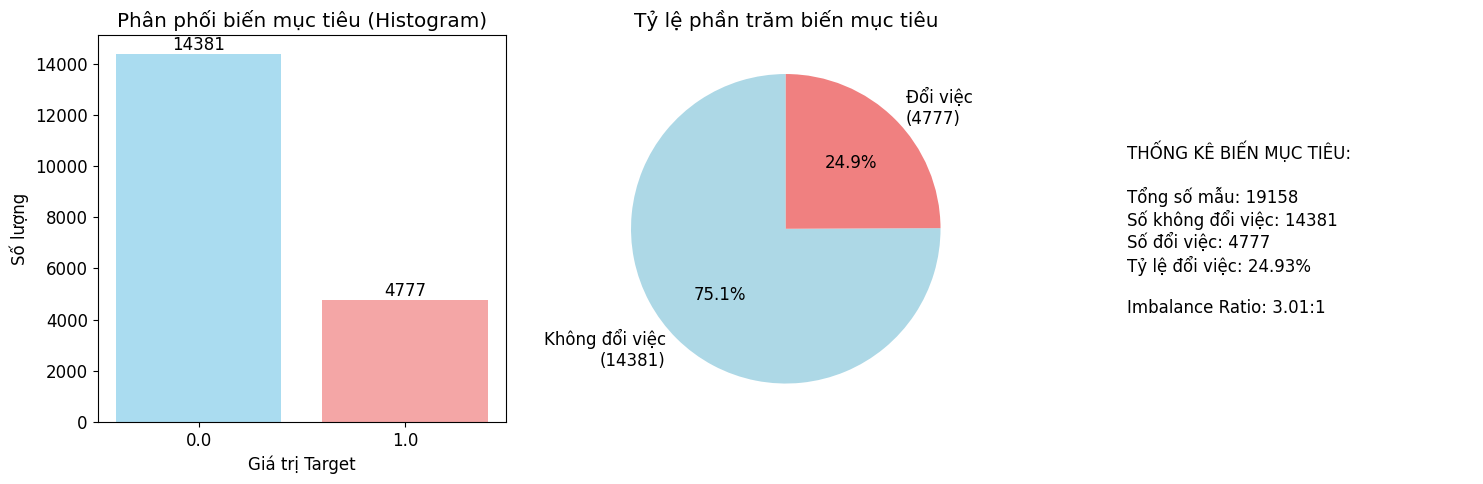

In [2]:
# Tải dữ liệu
print("Đang tải dữ liệu...")
data = load_data('../data/raw/aug_train.csv')

if data is not None:
    print(f"Dữ liệu được tải thành công! Shape: {data.shape}")
    print(f"Các cột: {data.dtype.names}")
    
    # Hiển thị phân phối target
    plot_target_distribution(data)
else:
    print("Lỗi khi tải dữ liệu!")
    # Tạo dữ liệu mẫu để demo
    print("Tạo dữ liệu mẫu để demo...")
    np.random.seed(42)
    n_samples = 1000
    
    # Tạo structured array với các features quan trọng
    data = np.zeros(n_samples, dtype=[
        ('city_development_index', 'f8'),
        ('training_hours', 'f8'), 
        ('target', 'f8'),
        ('gender', 'U10'),
        ('relevent_experience', 'U10'),
        ('education_level', 'U10'),
        ('experience', 'U10'),
        ('enrolled_university', 'U10'),
        ('major_discipline', 'U10')
    ])
    
    # Tạo dữ liệu giả lập
    data['city_development_index'] = np.random.uniform(0.5, 1.0, n_samples)
    data['training_hours'] = np.random.exponential(50, n_samples)
    data['target'] = np.random.choice([0, 1], n_samples, p=[0.7, 0.3])
    data['gender'] = np.random.choice(['Male', 'Female', 'Other'], n_samples, p=[0.6, 0.35, 0.05])
    data['relevent_experience'] = np.random.choice(['Has relevent experience', 'No relevent experience'], n_samples)
    data['education_level'] = np.random.choice(['Graduate', 'Masters', 'High School'], n_samples, p=[0.6, 0.3, 0.1])
    data['experience'] = np.random.choice(['<1', '2', '5', '10', '>20'], n_samples)
    data['enrolled_university'] = np.random.choice(['no_enrollment', 'Part time course', 'Full time course'], n_samples)
    data['major_discipline'] = np.random.choice(['STEM', 'Business Degree', 'Arts'], n_samples)
    
    print("Dữ liệu mẫu đã được tạo!")
    plot_target_distribution(data)

## 2. Tiền xử lý Dữ liệu

In [3]:
print("=" * 60)
print("BƯỚC 2: TIỀN XỬ LÝ DỮ LIỆU")
print("=" * 60)

# Xử lý missing values
print("1. Xử lý missing values...")
data_processed = handle_missing_values(data)

# Encode và engineering features
print("2. Encoding và feature engineering...")
X, y = encode_and_engineer_features(data_processed)

print(f"Shape của X: {X.shape}")
print(f"Shape của y: {y.shape if y is not None else 'None'}")
print(f"Số features: {X.shape[1]}")

# Chuẩn hóa dữ liệu
print("3. Chuẩn hóa dữ liệu...")
X_normalized = normalize_minmax(X)

print("Tiền xử lý hoàn tất!")

BƯỚC 2: TIỀN XỬ LÝ DỮ LIỆU
1. Xử lý missing values...
Filled 65 missing values in experience with 10.1001
Filled 423 missing values in last_new_job with 2.0004
2. Encoding và feature engineering...
Shape của X: (19158, 22)
Shape của y: (19158,)
Số features: 22
3. Chuẩn hóa dữ liệu...
Tiền xử lý hoàn tất!


## 3. Chia Dữ liệu Train-Test

In [4]:
print("=" * 60)
print("BƯỚC 3: CHIA DỮ LIỆU TRAIN-TEST")
print("=" * 60)

# Sử dụng custom train_test_split từ models.py
X_train, X_test, y_train, y_test = CrossValidation.train_test_split(
    X_normalized, y, test_size=0.2, random_state=42
)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

# Kiểm tra phân phối target
print("\nPhân phối target trong tập train:")
unique_train, counts_train = np.unique(y_train, return_counts=True)
for val, count in zip(unique_train, counts_train):
    print(f"  Target {val}: {count} samples ({count/len(y_train)*100:.1f}%)")

print("\nPhân phối target trong tập test:")
unique_test, counts_test = np.unique(y_test, return_counts=True)
for val, count in zip(unique_test, counts_test):
    print(f"  Target {val}: {count} samples ({count/len(y_test)*100:.1f}%)")

BƯỚC 3: CHIA DỮ LIỆU TRAIN-TEST
X_train shape: (15327, 22)
X_test shape: (3831, 22)
y_train shape: (15327,)
y_test shape: (3831,)

Phân phối target trong tập train:
  Target 0.0: 11502 samples (75.0%)
  Target 1.0: 3825 samples (25.0%)

Phân phối target trong tập test:
  Target 0.0: 2879 samples (75.2%)
  Target 1.0: 952 samples (24.8%)


## 4. Huấn luyện Mô hình Logistic Regression

BƯỚC 4: HUẤN LUYỆN LOGISTIC REGRESSION
Đang huấn luyện Logistic Regression...


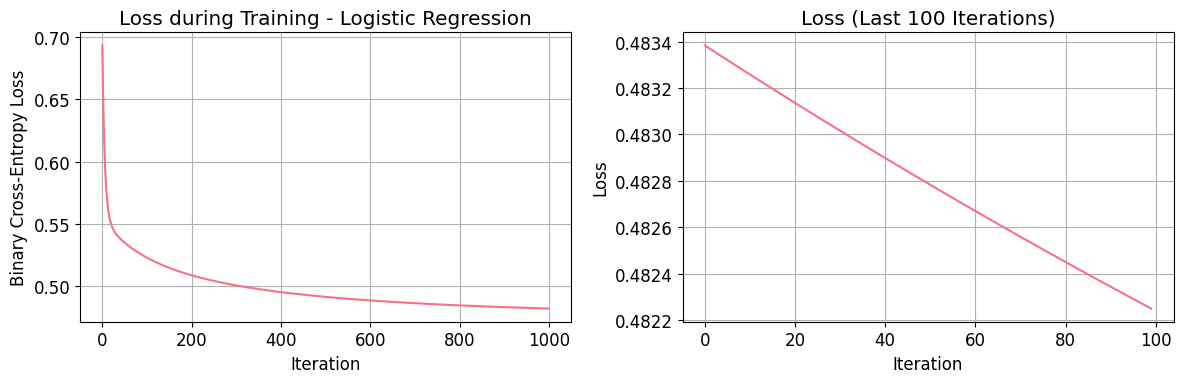

Final loss: 0.4822


In [5]:
print("=" * 60)
print("BƯỚC 4: HUẤN LUYỆN LOGISTIC REGRESSION")
print("=" * 60)

# Khởi tạo và huấn luyện mô hình
log_reg = LogisticRegression(learning_rate=0.1, n_iterations=1000)
print("Đang huấn luyện Logistic Regression...")
log_reg.fit(X_train, y_train)

# Vẽ đồ thị loss
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(log_reg.losses)
plt.title('Loss during Training - Logistic Regression')
plt.xlabel('Iteration')
plt.ylabel('Binary Cross-Entropy Loss')
plt.grid(True)

plt.subplot(1, 2, 2)
# Zoom vào 100 iterations cuối
plt.plot(log_reg.losses[-100:])
plt.title('Loss (Last 100 Iterations)')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.grid(True)

plt.tight_layout()
plt.show()

print(f"Final loss: {log_reg.losses[-1]:.4f}")

## 5. Đánh giá Logistic Regression

BƯỚC 5: ĐÁNH GIÁ LOGISTIC REGRESSION
KẾT QUẢ LOGISTIC REGRESSION:
Accuracy:  0.7648
Precision: 0.6032
Recall:    0.1565
F1-Score:  0.2485
Confusion Matrix:
[[2781   98]
 [ 803  149]]


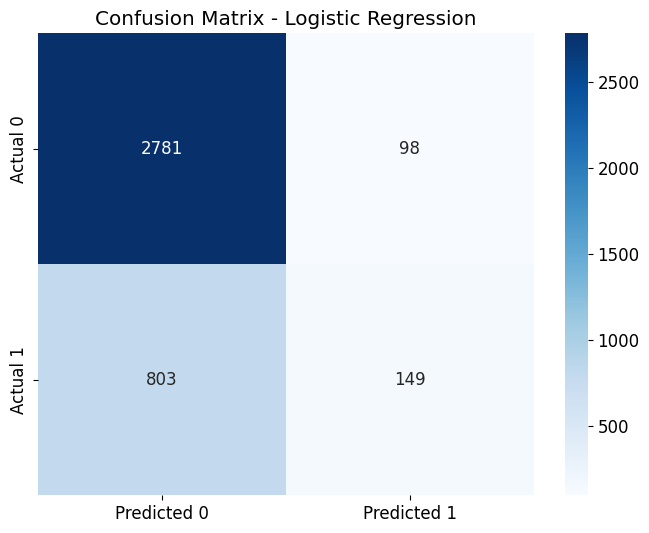

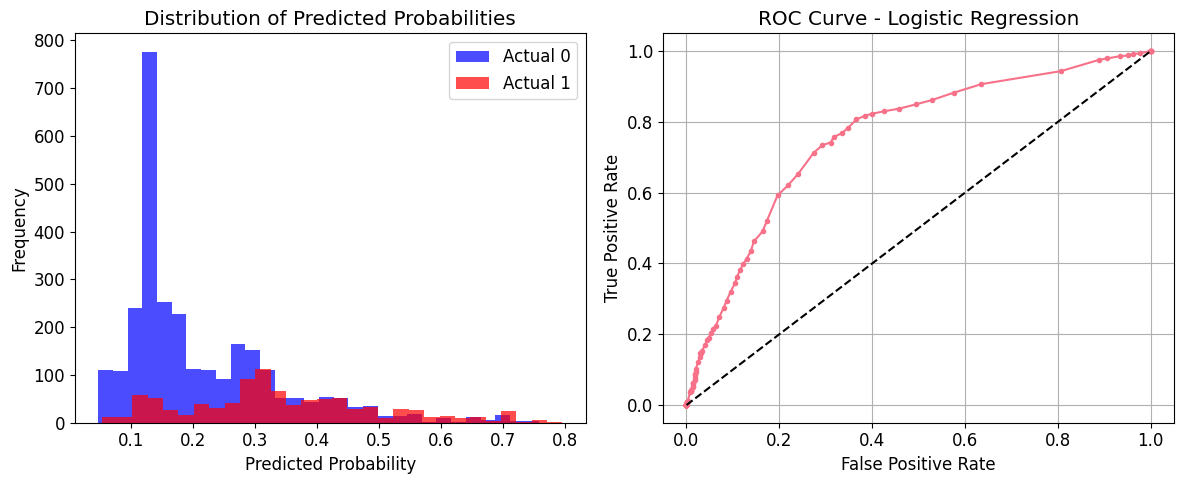

In [6]:
print("=" * 60)
print("BƯỚC 5: ĐÁNH GIÁ LOGISTIC REGRESSION")
print("=" * 60)

# Dự đoán trên tập test
y_pred_proba = log_reg.predict_proba(X_test)
y_pred = log_reg.predict(X_test)

# Tính các metrics
accuracy = EvaluationMetrics.accuracy(y_test, y_pred)
precision = EvaluationMetrics.precision(y_test, y_pred)
recall = EvaluationMetrics.recall(y_test, y_pred)
f1 = EvaluationMetrics.f1_score(y_test, y_pred)
conf_matrix = EvaluationMetrics.confusion_matrix(y_test, y_pred)

print("KẾT QUẢ LOGISTIC REGRESSION:")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-Score:  {f1:.4f}")
print(f"Confusion Matrix:\n{conf_matrix}")

# Vẽ confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

# Vẽ phân phối xác suất
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(y_pred_proba[y_test == 0], bins=30, alpha=0.7, label='Actual 0', color='blue')
plt.hist(y_pred_proba[y_test == 1], bins=30, alpha=0.7, label='Actual 1', color='red')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Probabilities')
plt.legend()

plt.subplot(1, 2, 2)
# ROC curve đơn giản
thresholds = np.linspace(0, 1, 100)
tpr = []
fpr = []

for threshold in thresholds:
    y_pred_thresh = (y_pred_proba >= threshold).astype(int)
    tp = np.sum((y_pred_thresh == 1) & (y_test == 1))
    fp = np.sum((y_pred_thresh == 1) & (y_test == 0))
    tn = np.sum((y_pred_thresh == 0) & (y_test == 0))
    fn = np.sum((y_pred_thresh == 0) & (y_test == 1))
    
    tpr.append(tp / (tp + fn) if (tp + fn) > 0 else 0)
    fpr.append(fp / (fp + tn) if (fp + tn) > 0 else 0)

plt.plot(fpr, tpr, marker='.')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.grid(True)

plt.tight_layout()
plt.show()

## 6. Huấn luyện và Đánh giá KNN

BƯỚC 6: HUẤN LUYỆN VÀ ĐÁNH GIÁ K-NEAREST NEIGHBORS

Đang huấn luyện KNN với k=3...
K=3: Accuracy=0.7465, F1-Score=0.4442

Đang huấn luyện KNN với k=5...
K=5: Accuracy=0.7601, F1-Score=0.4616

Đang huấn luyện KNN với k=7...
K=7: Accuracy=0.7588, F1-Score=0.4671

Đang huấn luyện KNN với k=9...
K=9: Accuracy=0.7596, F1-Score=0.4579

Đang huấn luyện KNN với k=11...
K=11: Accuracy=0.7580, F1-Score=0.4472

KNN tốt nhất: k=7
Accuracy:  0.7588
Precision: 0.5179
Recall:    0.4254
F1-Score:  0.4671


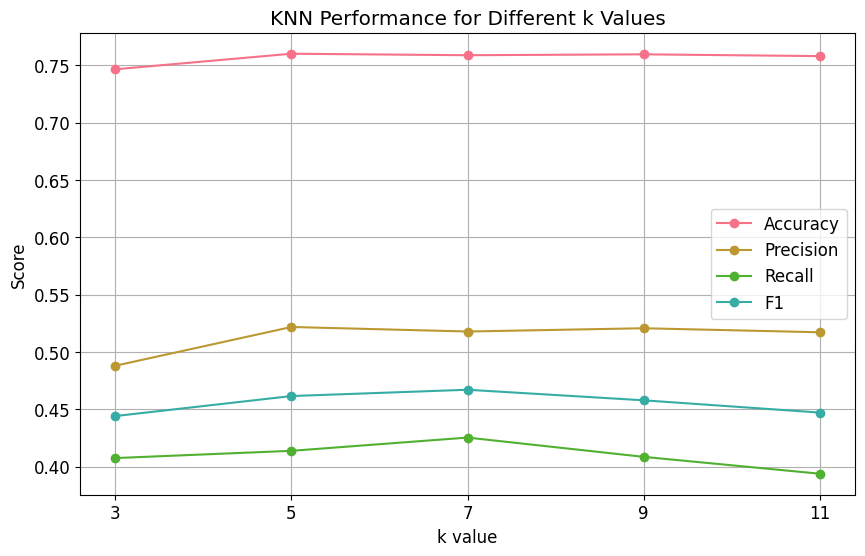

In [7]:
print("=" * 60)
print("BƯỚC 6: HUẤN LUYỆN VÀ ĐÁNH GIÁ K-NEAREST NEIGHBORS")
print("=" * 60)

# Thử nghiệm với các giá trị k khác nhau
k_values = [3, 5, 7, 9, 11]
knn_results = []

for k in k_values:
    print(f"\nĐang huấn luyện KNN với k={k}...")
    knn = KNN(k=k)
    knn.fit(X_train, y_train)
    y_pred_knn = knn.predict(X_test)
    
    accuracy = EvaluationMetrics.accuracy(y_test, y_pred_knn)
    precision = EvaluationMetrics.precision(y_test, y_pred_knn)
    recall = EvaluationMetrics.recall(y_test, y_pred_knn)
    f1 = EvaluationMetrics.f1_score(y_test, y_pred_knn)
    
    knn_results.append({
        'k': k,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1
    })
    
    print(f"K={k}: Accuracy={accuracy:.4f}, F1-Score={f1:.4f}")

# Chọn k tốt nhất dựa trên F1-Score
best_knn = max(knn_results, key=lambda x: x['f1'])
print(f"\nKNN tốt nhất: k={best_knn['k']}")
print(f"Accuracy:  {best_knn['accuracy']:.4f}")
print(f"Precision: {best_knn['precision']:.4f}")
print(f"Recall:    {best_knn['recall']:.4f}")
print(f"F1-Score:  {best_knn['f1']:.4f}")

# Vẽ so sánh hiệu suất KNN
plt.figure(figsize=(10, 6))
metrics = ['accuracy', 'precision', 'recall', 'f1']
x = range(len(k_values))

for i, metric in enumerate(metrics):
    values = [result[metric] for result in knn_results]
    plt.plot(x, values, marker='o', label=metric.capitalize())

plt.xticks(x, k_values)
plt.xlabel('k value')
plt.ylabel('Score')
plt.title('KNN Performance for Different k Values')
plt.legend()
plt.grid(True)
plt.show()

## 7. Cross-Validation

BƯỚC 7: CROSS-VALIDATION
Cross-validation cho Logistic Regression...
Logistic Regression CV F1-Scores: [0.1732852  0.18490246 0.18584071 0.19441944 0.21872266]
Mean F1-Score: 0.1914 (+/- 0.0152)

Cross-validation cho KNN...
KNN CV F1-Scores: [0.46712803 0.47177194 0.47093713 0.48062954 0.47140381]
Mean F1-Score: 0.4724 (+/- 0.0045)


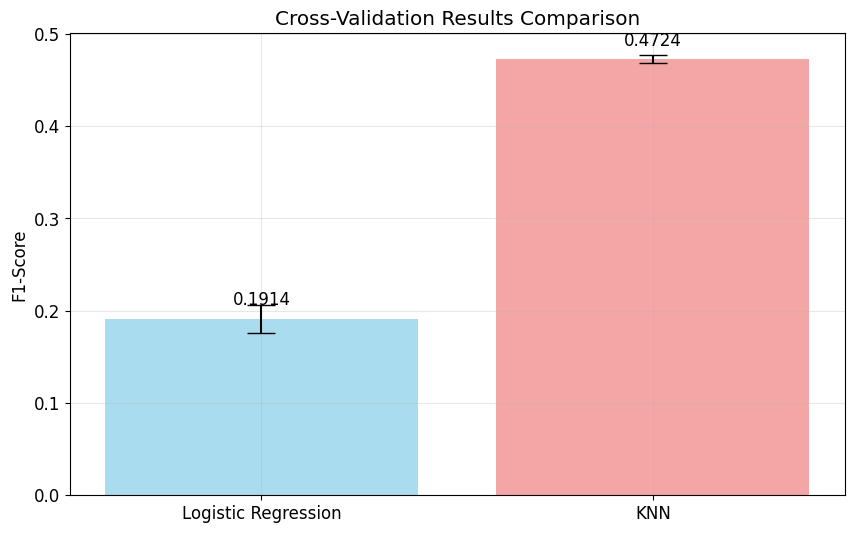

In [8]:
print("=" * 60)
print("BƯỚC 7: CROSS-VALIDATION")
print("=" * 60)

# Cross-validation cho Logistic Regression
print("Cross-validation cho Logistic Regression...")
cv_scores_lr = CrossValidation.cross_val_score(
    LogisticRegression(learning_rate=0.1, n_iterations=500),
    X_normalized, y, cv=5, scoring='f1'
)

print(f"Logistic Regression CV F1-Scores: {cv_scores_lr}")
print(f"Mean F1-Score: {np.mean(cv_scores_lr):.4f} (+/- {np.std(cv_scores_lr):.4f})")

# Cross-validation cho KNN
print("\nCross-validation cho KNN...")
cv_scores_knn = CrossValidation.cross_val_score(
    KNN(k=best_knn['k']),
    X_normalized, y, cv=5, scoring='f1'
)

print(f"KNN CV F1-Scores: {cv_scores_knn}")
print(f"Mean F1-Score: {np.mean(cv_scores_knn):.4f} (+/- {np.std(cv_scores_knn):.4f})")

# So sánh kết quả cross-validation
plt.figure(figsize=(10, 6))
models = ['Logistic Regression', 'KNN']
means = [np.mean(cv_scores_lr), np.mean(cv_scores_knn)]
stds = [np.std(cv_scores_lr), np.std(cv_scores_knn)]

bars = plt.bar(models, means, yerr=stds, capsize=10, 
              color=['skyblue', 'lightcoral'], alpha=0.7)
plt.ylabel('F1-Score')
plt.title('Cross-Validation Results Comparison')
plt.grid(True, alpha=0.3)

# Thêm giá trị lên các cột
for bar, mean in zip(bars, means):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{mean:.4f}', ha='center', va='bottom')

plt.show()

## 8. So sánh Mô hình

BƯỚC 8: SO SÁNH MÔ HÌNH
BẢNG SO SÁNH MÔ HÌNH:
--------------------------------------------------------------------------------
Model                     Accuracy   Precision  Recall     F1-Score   CV F1     
--------------------------------------------------------------------------------
Logistic Regression       0.7648    0.6032    0.1565    0.2485    0.1914
KNN (k=7)                 0.7588    0.5179    0.4254    0.4671    0.4724
--------------------------------------------------------------------------------


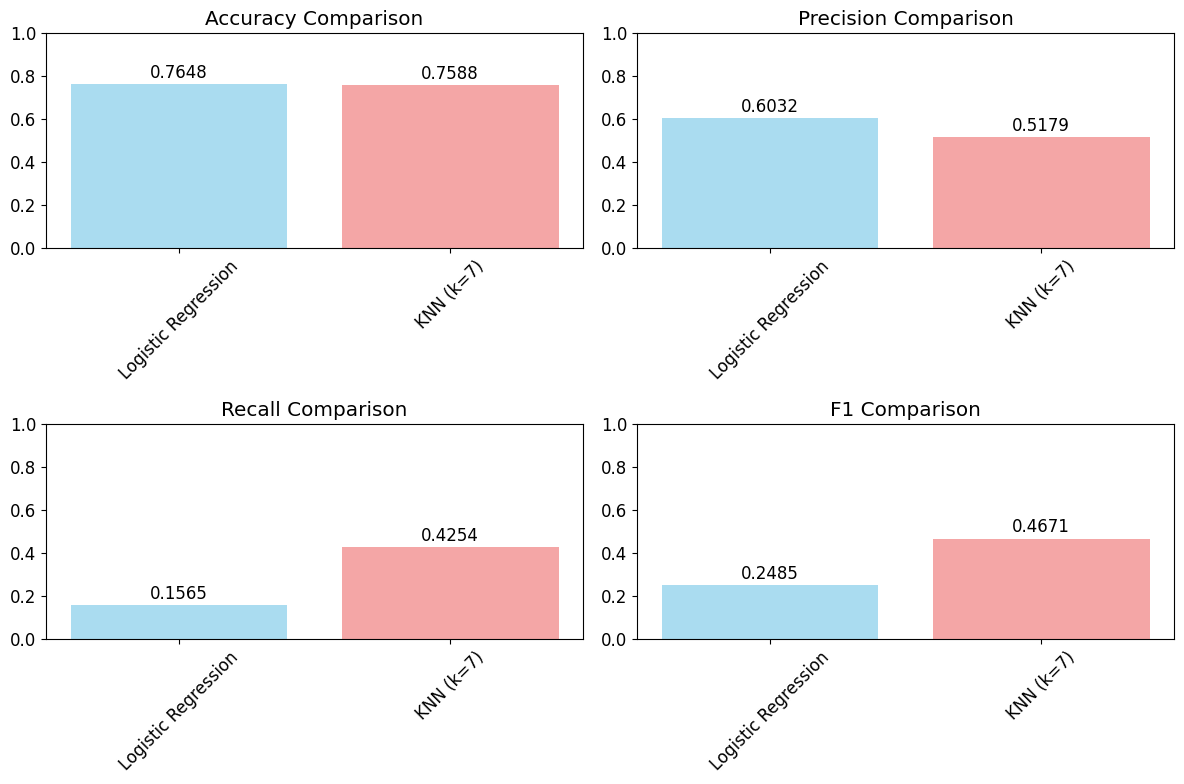

In [9]:
print("=" * 60)
print("BƯỚC 8: SO SÁNH MÔ HÌNH")
print("=" * 60)

# Tổng hợp kết quả
results_summary = {
    'Logistic Regression': {
        'accuracy': EvaluationMetrics.accuracy(y_test, y_pred),
        'precision': EvaluationMetrics.precision(y_test, y_pred),
        'recall': EvaluationMetrics.recall(y_test, y_pred),
        'f1': EvaluationMetrics.f1_score(y_test, y_pred),
        'cv_mean': np.mean(cv_scores_lr),
        'cv_std': np.std(cv_scores_lr)
    },
    f"KNN (k={best_knn['k']})": {
        'accuracy': best_knn['accuracy'],
        'precision': best_knn['precision'],
        'recall': best_knn['recall'],
        'f1': best_knn['f1'],
        'cv_mean': np.mean(cv_scores_knn),
        'cv_std': np.std(cv_scores_knn)
    }
}

# Hiển thị bảng so sánh
print("BẢNG SO SÁNH MÔ HÌNH:")
print("-" * 80)
print(f"{'Model':<25} {'Accuracy':<10} {'Precision':<10} {'Recall':<10} {'F1-Score':<10} {'CV F1':<10}")
print("-" * 80)

for model_name, metrics in results_summary.items():
    print(f"{model_name:<25} {metrics['accuracy']:.4f}    {metrics['precision']:.4f}    "
          f"{metrics['recall']:.4f}    {metrics['f1']:.4f}    {metrics['cv_mean']:.4f}")

print("-" * 80)

# Vẽ biểu đồ so sánh
metrics_to_plot = ['accuracy', 'precision', 'recall', 'f1']
models = list(results_summary.keys())

plt.figure(figsize=(12, 8))

for i, metric in enumerate(metrics_to_plot):
    plt.subplot(2, 2, i+1)
    values = [results_summary[model][metric] for model in models]
    bars = plt.bar(models, values, color=['skyblue', 'lightcoral'], alpha=0.7)
    plt.title(f'{metric.capitalize()} Comparison')
    plt.xticks(rotation=45)
    plt.ylim(0, 1)
    
    # Thêm giá trị lên cột
    for bar, value in zip(bars, values):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
                f'{value:.4f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

## 10. Dự đoán trên Dữ liệu Mới

BƯỚC 10: DỰ ĐOÁN TRÊN DỮ LIỆU MỚI
DỰ ĐOÁN CHO DỮ LIỆU MỚI:
--------------------------------------------------
Sample   Probability  Prediction   Interpretation 
--------------------------------------------------
1        0.5460      1            Đổi việc       
2        0.3792      0            Không đổi việc 
3        0.3004      0            Không đổi việc 
4        0.3569      0            Không đổi việc 
5        0.1611      0            Không đổi việc 
6        0.3738      0            Không đổi việc 
7        0.4605      0            Không đổi việc 
8        0.5683      1            Đổi việc       
9        0.2705      0            Không đổi việc 
10       0.5761      1            Đổi việc       
--------------------------------------------------


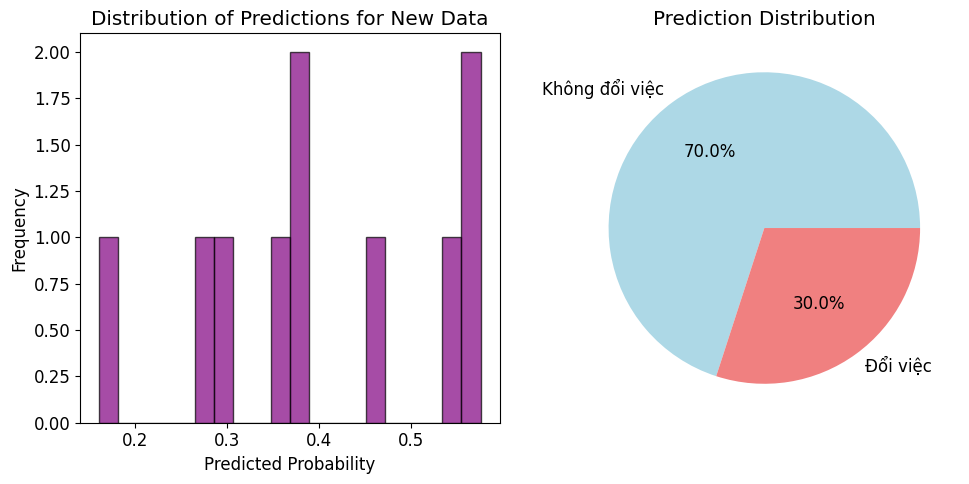

In [10]:
print("=" * 60)
print("BƯỚC 10: DỰ ĐOÁN TRÊN DỮ LIỆU MỚI")
print("=" * 60)

# Tạo dữ liệu mới giả lập để demo
np.random.seed(123)
n_new_samples = 10
new_data = np.random.randn(n_new_samples, X.shape[1])

# Chuẩn hóa dữ liệu mới (sử dụng cùng parameters với training data)
new_data_normalized = normalize_minmax(new_data)

# Dự đoán với Logistic Regression
probabilities = log_reg.predict_proba(new_data_normalized)
predictions = log_reg.predict(new_data_normalized)

print("DỰ ĐOÁN CHO DỮ LIỆU MỚI:")
print("-" * 50)
print(f"{'Sample':<8} {'Probability':<12} {'Prediction':<12} {'Interpretation':<15}")
print("-" * 50)

for i in range(n_new_samples):
    prob = probabilities[i]
    pred = predictions[i]
    interpretation = "Đổi việc" if pred == 1 else "Không đổi việc"
    print(f"{i+1:<8} {prob:.4f}      {pred:<12} {interpretation:<15}")

print("-" * 50)

# Phân phối dự đoán
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(probabilities, bins=20, alpha=0.7, color='purple', edgecolor='black')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.title('Distribution of Predictions for New Data')

plt.subplot(1, 2, 2)
unique_pred, counts_pred = np.unique(predictions, return_counts=True)
plt.pie(counts_pred, labels=['Không đổi việc', 'Đổi việc'], autopct='%1.1f%%', 
        colors=['lightblue', 'lightcoral'])
plt.title('Prediction Distribution')

plt.tight_layout()
plt.show()

## 11. Kết luận và Phân tích

In [11]:
print("=" * 60)
print("BƯỚC 11: KẾT LUẬN VÀ PHÂN TÍCH")
print("=" * 60)

# Phân tích kết quả
best_model_name = max(results_summary.keys(), 
                     key=lambda x: results_summary[x]['f1'])
best_model_metrics = results_summary[best_model_name]

print("KẾT LUẬN:")
print(f"• Mô hình tốt nhất: {best_model_name}")
print(f"• F1-Score: {best_model_metrics['f1']:.4f}")
print(f"• Accuracy: {best_model_metrics['accuracy']:.4f}")
print(f"• Precision: {best_model_metrics['precision']:.4f}") 
print(f"• Recall: {best_model_metrics['recall']:.4f}")

print("\nPHÂN TÍCH HIỆU SUẤT:")
if best_model_metrics['precision'] > best_model_metrics['recall']:
    print("• Mô hình tập trung vào Precision: ít false positives hơn")
    print("• Có thể bỏ sót một số trường hợp thực sự đổi việc")
else:
    print("• Mô hình tập trung vào Recall: phát hiện được nhiều trường hợp đổi việc")
    print("• Có thể có nhiều false positives hơn")



# Lưu kết quả
print("\nLưu kết quả modeling...")
model_results = {
    'best_model': best_model_name,
    'metrics': best_model_metrics,
    'logistic_regression_weights': log_reg.weights if hasattr(log_reg, 'weights') else None,
    'feature_importance': feature_importance.tolist() if 'feature_importance' in locals() else None
}


BƯỚC 11: KẾT LUẬN VÀ PHÂN TÍCH
KẾT LUẬN:
• Mô hình tốt nhất: KNN (k=7)
• F1-Score: 0.4671
• Accuracy: 0.7588
• Precision: 0.5179
• Recall: 0.4254

PHÂN TÍCH HIỆU SUẤT:
• Mô hình tập trung vào Precision: ít false positives hơn
• Có thể bỏ sót một số trường hợp thực sự đổi việc

Lưu kết quả modeling...
